In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from model import *

In [7]:
df = pd.read_csv('result.csv',encoding = 'unicode_escape')
df.iloc[:5]

,Station_Name,Date,Max_Temp,Min_Temp,Avg_Temp,Sum_Fall,Kind_of_Fall,Snow_height
0,GDAÑSK-RÊBIECHOWO,01-01-2020,4.5,-0.9,2.2,0.0,NaN,0
1,GDAÑSK-RÊBIECHOWO,02-01-2020,5.0,-1.3,1.9,0.0,NaN,0
2,GDAÑSK-RÊBIECHOWO,03-01-2020,3.5,-0.8,1.7,2.2,W,0
3,GDAÑSK-RÊBIECHOWO,04-01-2020,4.3,0.1,2.3,5.5,S,0
4,GDAÑSK-RÊBIECHOWO,05-01-2020,1.8,-1.8,-0.2,0.3,S,1


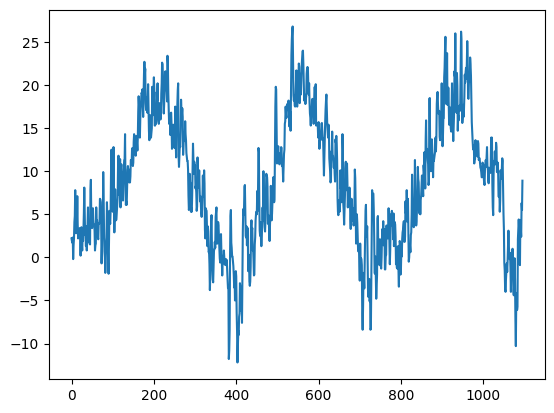

In [13]:
x = np.arange(len(df))
y = np.array(df[' Avg_Temp'])
plt.plot(x, y)

In [21]:
model = Linear_reg()
print(model)


0 = 0z + 0x + 0y
